In [1]:
import pandas as pd #data manipulation
import numpy as np #numerical operations
#visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt
!pip install plotly_express
import plotly_express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import plot_tree

In [6]:
# Loading the data
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/phishing.csv')
df.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [16]:
df['Label'].value_counts()

0    5000
1    5000
Name: Label, dtype: int64

In [17]:
df.shape

(10000, 18)

In [9]:
df.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

In [11]:
df.describe() #statistics of each column

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [12]:
df.nunique()

Domain           3553
Have_IP             2
Have_At             2
URL_Length          2
URL_Depth          18
Redirection         2
https_Domain        2
TinyURL             2
Prefix/Suffix       2
DNS_Record          2
Web_Traffic         2
Domain_Age          2
Domain_End          2
iFrame              2
Mouse_Over          2
Right_Click         2
Web_Forwards        2
Label               2
dtype: int64

In [18]:
df.isnull().sum() #represent count of missing values in each column

Domain           0
Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

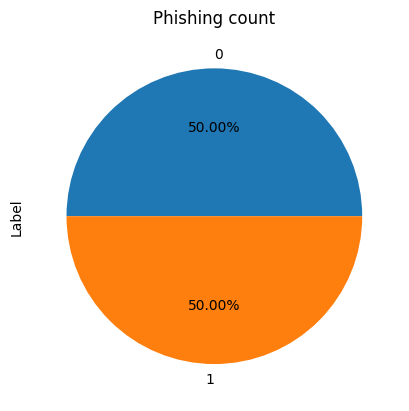

In [14]:

df['Label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Phishing count')
plt.show()

<ipython-input-15-40841119ac33>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df["Label"],kde=False,rug=False)


<Axes: xlabel='Label'>

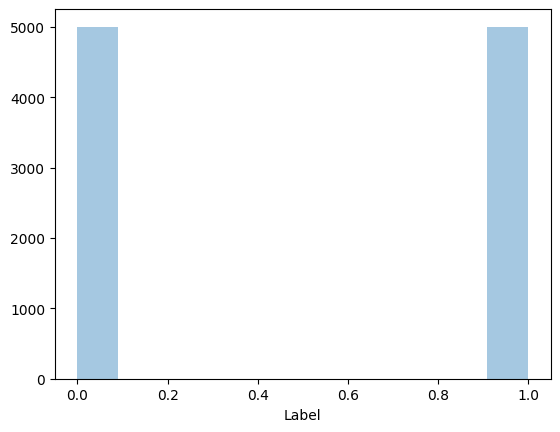

In [15]:
sns.distplot(a=df["Label"],kde=False,rug=False)

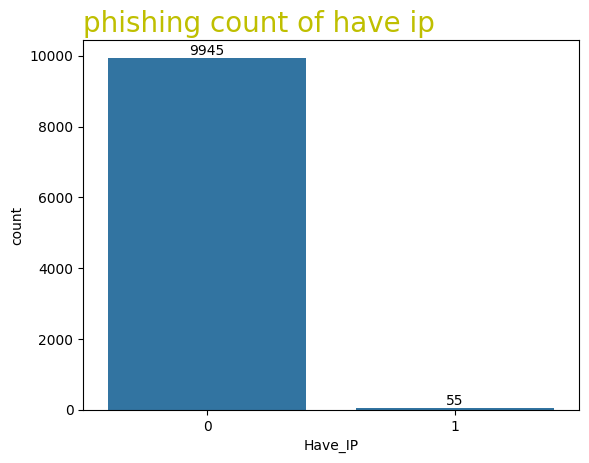

In [19]:
count=sns.countplot(x=df.Have_IP,data=df)
for i in count.containers:
  count.bar_label(i)
plt.title("phishing count of have ip",color='y',size=20,loc='left')
plt.show()

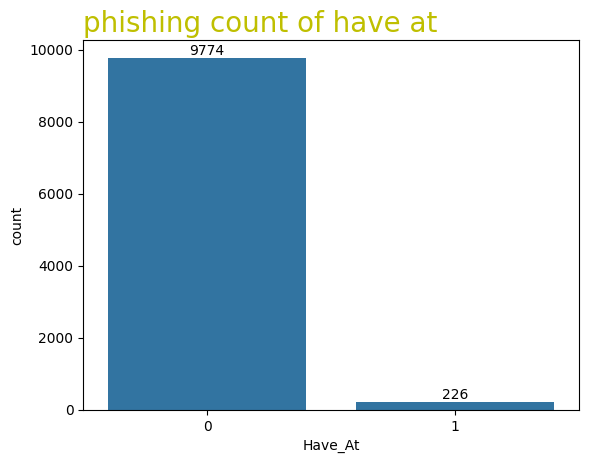

In [20]:
count=sns.countplot(x=df.Have_At,data=df)
for i in count.containers:
  count.bar_label(i)
plt.title("phishing count of have at",color='y',size=20,loc='left')
plt.show()

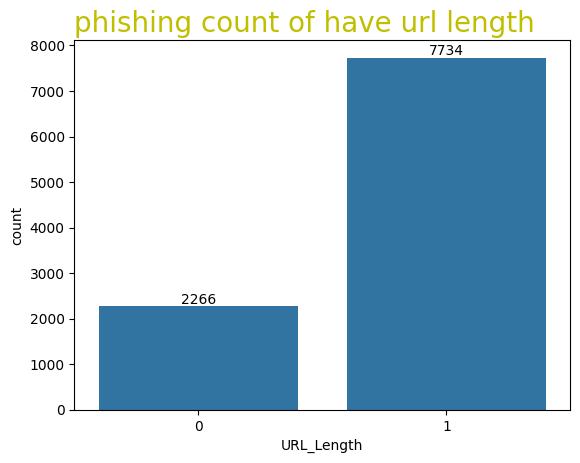

In [21]:
count=sns.countplot(x=df.URL_Length,data=df)
for i in count.containers:
  count.bar_label(i)
plt.title("phishing count of have url length",color='y',size=20,loc='left')
plt.show()

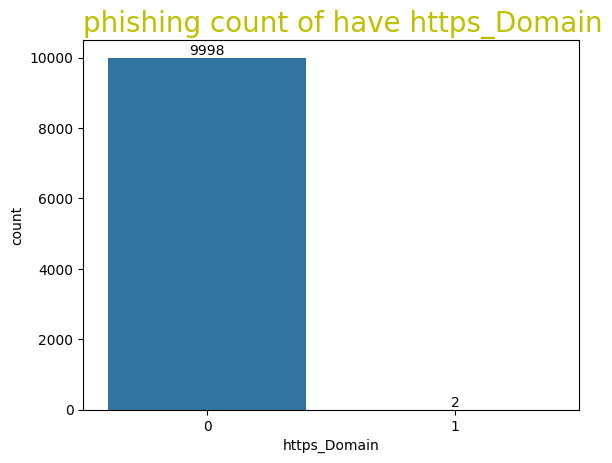

In [22]:
count=sns.countplot(x=df.https_Domain,data=df)
for i in count.containers:
  count.bar_label(i)
plt.title("phishing count of have https_Domain",color='y',size=20,loc='left')
plt.show()

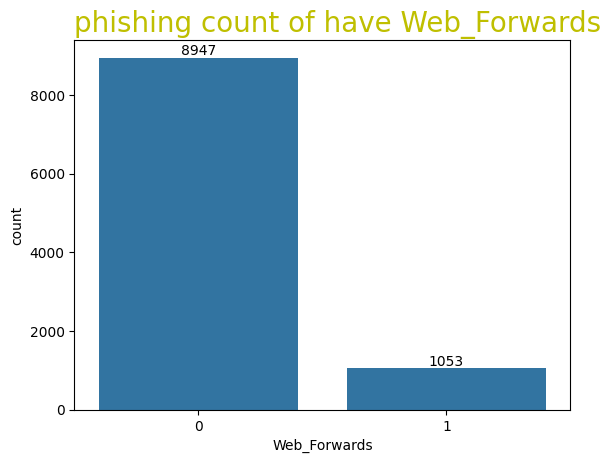

In [23]:
count=sns.countplot(x=df.Web_Forwards,data=df)
for i in count.containers:
  count.bar_label(i)
plt.title("phishing count of have Web_Forwards",color='y',size=20,loc='left')
plt.show()

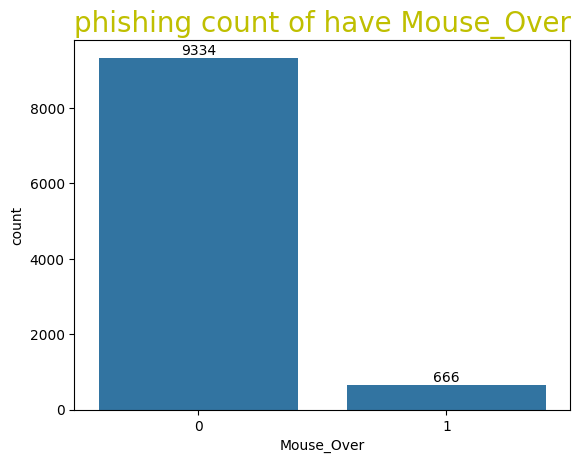

In [24]:
count=sns.countplot(x=df.Mouse_Over,data=df)
for i in count.containers:
  count.bar_label(i)
plt.title("phishing count of have Mouse_Over",color='y',size=20,loc='left')
plt.show()

In [31]:
M=df['Domain']
len(M)


10000

In [30]:
y = df['Label']
X = df.drop(['Label', 'Domain'], axis=1)


In [32]:
# Splitting the dataset into train and test sets: 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
Train=len(X_train)
test=len(X_test)
print(Train,test)

8000 2000


In [34]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [44]:
model = DecisionTreeClassifier(max_depth=5)

In [42]:
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])


In [45]:
# Fitting the model with training data
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click',
       'Web_Forwards'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', DecisionTreeClassifier(max_depth=6))])

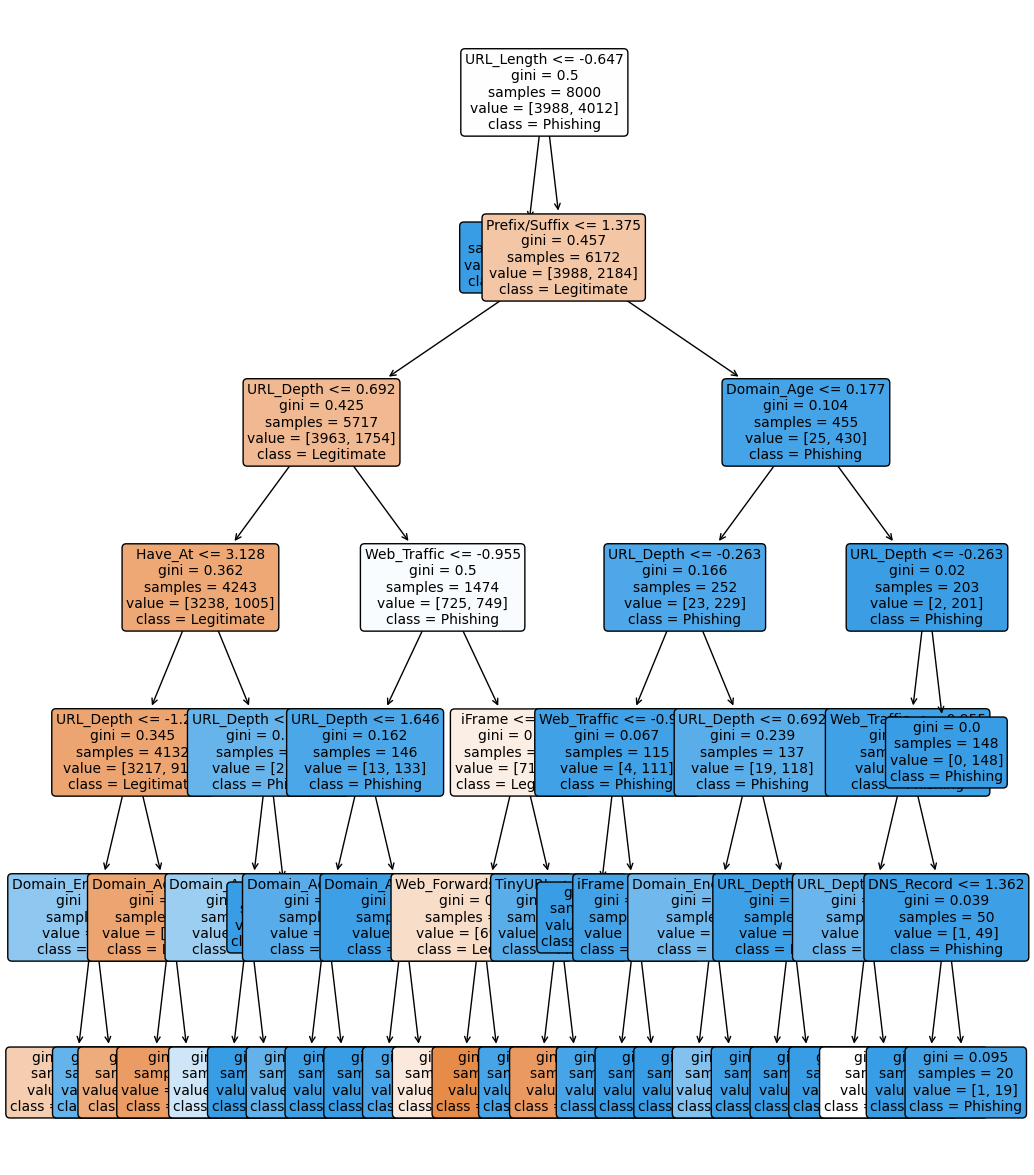

In [46]:
plt.figure(figsize=(12, 15))
plot_tree(pipe.named_steps['classifier'], feature_names=numeric_features.tolist() + categorical_features.tolist(),
          class_names=['Legitimate', 'Phishing'], filled=True, rounded=True, fontsize=10)
plt.show()

In [37]:
# Predicting the target value for test data
y_test_pred = pipe.predict(X_test)
print(y_test_pred)

[1 0 1 ... 1 0 1]


In [38]:
# Computing the accuracy of the model performance
acc_test = accuracy_score(y_test, y_test_pred)
print("Decision Tree: Accuracy on Test Data: {:.3f}".format(acc_test))
'''the error margin is 20%, the actual value for the data for testing is y_test and y_test__pred is prediction after training'''

Decision Tree: Accuracy on Test Data: 0.806


'the error margin is 20%, the actual value for the data for testing is y_test and y_test__pred is prediction after training'

In [ ]:
df1= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/testcase.csv')
n=int(input('enter the no of url from test dataset (row no)'))
n=n-1
n_url=df1['Domain'].iloc[n]
#creating a new Datafram containing single row features
new_url_data = pd.DataFrame({'Have_IP': [df1['Have_IP'].iloc[n]],
    'Have_At': [df1['Have_At'].iloc[n]],
    'URL_Length': [df1['URL_Length'].iloc[n]],
    'URL_Depth': [df1['URL_Depth'].iloc[n]],
    'Redirection': [df1['Redirection'].iloc[n]],
    'https_Domain': [df1['https_Domain'].iloc[n]],
    'TinyURL': [df1['TinyURL'].iloc[n]],
    'Prefix/Suffix': [df1['Prefix/Suffix'].iloc[n]],
    'DNS_Record': [df1['DNS_Record'].iloc[n]],
    'Web_Traffic': [df1['Web_Traffic'].iloc[n]],
    'Domain_Age': [df1['Domain_Age'].iloc[n]],
    'Domain_End': [df1['Domain_End'].iloc[n]],
    'iFrame': [df1['iFrame'].iloc[n]],
    'Mouse_Over': [df1['Mouse_Over'].iloc[n]],
    'Right_Click': [df1['Right_Click'].iloc[n]],
    'Web_Forwards': [df1['Web_Forwards'].iloc[n]]
})
# Rest of your code
result = pipe.predict(new_url_data)
if (result==1):
    print(n_url,":is a phishing url")
else:
    print(n_url,":is a legitimate url")


In [ ]:
fig1 = px.histogram(df1, x="Labels", color="Labels", color_discrete_sequence=["#871fff","#ffa78c"])
fig1.show()